In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import csv
import re
import matplotlib.pyplot as plt

### Question 2
### read in data
2. Prepare: Write a function to process votes into a series of transaction records.

In [2]:
file_pol = "votesmart_20bill.txt"
file_bills = "votesmart_20bill_meaning.txt"

In [3]:
#create dictionary of what keywords mean
with open(file_bills, 'r') as f:
    reader = csv.reader(f, dialect='excel', delimiter='\n')
    count = 0
    pol_dict = {}
    for row in reader: 
        if count%2 == 0:
            if count == 0:
                key = count
            else:
                key +=1
        elif count%2 == 1:
            try:
                pol_dict[key] = re.search(r'\'(.*)\'', row[0]).group(0)
            except:
                print "skipped" + row[0]
        count+=1

skippeda


In [4]:
pol_dict

{0: "'Republican'",
 1: "'Democratic'",
 2: "'Prohibiting Federal Funding of National Public Radio -- Nay'",
 3: "'Prohibiting Federal Funding of National Public Radio -- Yea'",
 4: "'Removing Troops from Afghanistan -- Nay'",
 5: "'Removing Troops from Afghanistan -- Yea'",
 6: "'Terminating the Home Affordable Modification Program -- Nay'",
 7: "'Terminating the Home Affordable Modification Program -- Yea'",
 8: "'Repealing the Health Care Bill -- Nay'",
 9: "'Repealing the Health Care Bill -- Yea'",
 10: "'Science and Technology Funding -- Nay'",
 11: "'Science and Technology Funding -- Yea'",
 12: '\'"Whistleblower Protection" for Offshore Oil Workers -- Nay\'',
 13: '\'"Whistleblower Protection" for Offshore Oil Workers -- Yea\'',
 14: '\'Repealing "Don\\\\\\\'t Ask, Don\\\\\\\'t Tell" After Military Review and Certification -- Nay\'',
 15: '\'Repealing "Don\\\\\\\'t Ask, Don\\\\\\\'t Tell" After Military Review and Certification -- Yea\'',
 16: "'Unemployment Benefits Extension -

In [4]:
#{person i: party, bills they voted on}
with open(file_pol, 'r') as f:
    next(f) #skip the first line 
    reader = csv.reader(f, dialect='excel', delimiter='\n')
    politicians = {}
    bills = []
    first = True
    count = 1
    for row in reader:
        if '(' in row[0]:
            if first == False:
                politicians[politician_i] = bills
                count+=1
            politician_i = count
            politicians[politician_i] = {}
            bills = []
        elif re.search('I0$', row[0]) or re.search('I1$', row[0]):
            bills.append(int(float(row[0][1:])))
            first = False
        else:
            try:
                row = int(float(re.search("I(.*)$", row[0]).group(1)))
            except:
                print row
            bills.append(row)

['aa.']


In [6]:
len(politicians)

566

In [7]:
politicians

{1: [0, 7, 9, 10, 12, 14, 21, 23, 25, 26, 28],
 2: [0, 3, 4, 7, 9, 10, 13, 14, 16, 21, 23, 25, 26, 28],
 3: [0, 3, 4, 7, 9, 23, 25, 26],
 4: [0, 3, 4, 7, 9, 10, 13, 14, 16, 21, 23, 25, 26, 28],
 5: [1, 2, 5, 7, 8, 11, 13, 15, 17, 21, 22, 24, 27, 29],
 6: [1, 2, 5, 6, 8, 13, 17, 21, 22, 24, 27, 29],
 7: [0, 3, 4, 7, 9, 23, 25, 26],
 8: [1, 2, 5, 6, 8, 11, 13, 15, 17, 21, 22, 24, 27, 29],
 9: [1, 2, 5, 7, 8, 11, 13, 15, 17, 21, 22, 24, 27, 29],
 10: [1, 2, 4, 6, 8, 11, 13, 15, 17, 21, 22, 25, 26, 29],
 11: [0, 3, 4, 7, 9, 10, 13, 15, 17, 21, 23, 25, 26, 28],
 12: [1, 11, 15, 17, 20],
 13: [0, 3, 4, 7, 9, 23, 25, 26],
 14: [0, 3, 4, 7, 9, 11, 12, 14, 16, 21, 23, 25, 26, 28],
 15: [1, 11, 13, 15, 17, 21, 29],
 16: [0, 3, 4, 9, 10, 12, 14, 16, 23, 25, 26, 28],
 17: [1, 2, 4, 6, 8, 11, 13, 15, 17, 21, 22, 24, 27, 29],
 18: [0],
 19: [1, 11, 13, 15, 16, 21, 28],
 20: [0, 3, 4, 6, 9, 13, 14, 17, 21, 23, 25, 26, 28],
 21: [0, 7, 9, 10, 12, 14, 16, 21, 23, 25, 26, 28],
 22: [2, 5, 6, 8, 11, 13, 

In [8]:
#can search what bills are like this:
pol_dict[politicians[1][0]]

"'Republican'"

In [5]:
#apriori alg from harrington
#test dataset
def loadDataSet():
    return [[1, 3, 4], [2, 3, 5], [1, 2, 3, 5], [2, 5]]

#this creates a frozen set of all items in the dataset
#calculate the support for very itemset.
#The frozenset type is immutable and hashable -- 
#its contents cannot be altered after is created; 
#however, it can be used as a dictionary key or as an element of another set.
def createC1(dataSet):
    C1 = []
    for transaction in dataSet:
        for item in transaction:
            if not [item] in C1:
                C1.append([item])
    C1.sort()
    return map(frozenset, C1)

# This function takes three arguments:
# a dataset, Ck, a list of candidate sets, and minSupport, which is the minimum
# support you’re interested in. This is the function you’ll use to generate L1 from C1.
# Additionally, this function returns a dictionary with support values for use later. 
def scanD(D, Ck, minSupport):
    ssCnt = {}
    for tid in D:
        for can in Ck:
            if can.issubset(tid):
                if not ssCnt.has_key(can): ssCnt[can]=1
                else: ssCnt[can] += 1
    numItems = float(len(D))
    retList = []
    supportData = {}
    for key in ssCnt:
        support = ssCnt[key]/numItems
        if support >= minSupport:
            retList.insert(0,key)
        supportData[key] = support
    return retList, supportData

#joins sets if first k-2 items are equal
# take a list of frequent itemsets, Lk, and the size of
# the itemsets, k, to produce Ck
def aprioriGen(Lk, k): 
    retList = []
    lenLk = len(Lk)
    for i in range(lenLk):
        for j in range(i+1, lenLk):
            L1 = list(Lk[i])[:k-2]; L2 = list(Lk[j])[:k-2]
            L1.sort(); L2.sort()
            if L1==L2:
                retList.append(Lk[i] | Lk[j]) #| is union in Python
    return retList

#get Lk from Ck
def apriori(dataSet, minSupport):
    C1 = createC1(dataSet)
    D = map(set, dataSet)
    L1, supportData = scanD(D, C1, minSupport)
    L = [L1]
    k = 2
    while (len(L[k-2]) > 0):
        Ck = aprioriGen(L[k-2], k)
        Lk, supK = scanD(D, Ck, minSupport)
        supportData.update(supK)
        L.append(Lk)
        k += 1
    return L, supportData

In [6]:
a = loadDataSet()
C1 = createC1(a)
D = map(set, a)
print C1
print D
#now everything is in set form so we can use the scanD function. use 0.5 as support level
L1, suppData0 = scanD(D, C1, 0.5)
print L1
print suppData0 #4 didn't make it into minimum support level
L, suppData = apriori(a, 0.5)

[frozenset([1]), frozenset([2]), frozenset([3]), frozenset([4]), frozenset([5])]
[set([1, 3, 4]), set([2, 3, 5]), set([1, 2, 3, 5]), set([2, 5])]
[frozenset([1]), frozenset([3]), frozenset([2]), frozenset([5])]
{frozenset([4]): 0.25, frozenset([5]): 0.75, frozenset([2]): 0.75, frozenset([3]): 0.75, frozenset([1]): 0.5}


In [7]:
#association rules from harrington 
#only get rules that have greater than 2 items in item-set
def generateRules(L, supportData, minConf):
    bigRuleList = []
    for i in range(1, len(L)):
        for freqSet in L[i]:
            H1 = [frozenset([item]) for item in freqSet]
            if (i > 1):
                rulesFromConseq(freqSet, H1, supportData, bigRuleList,\
                minConf)
            else:
                calcConf(freqSet, H1, supportData, bigRuleList, minConf)
    return bigRuleList
def calcConf(freqSet, H, supportData, brl, minConf=0.7):
    prunedH = []
    for conseq in H:
        conf = supportData[freqSet]/supportData[freqSet-conseq]
        if conf >= minConf:
#             print freqSet-conseq,'-->',conseq,'conf:',conf
            brl.append((freqSet-conseq, conseq, conf))
        prunedH.append(conseq)
    return prunedH
def rulesFromConseq(freqSet, H, supportData, brl, minConf=0.7):
    m = len(H[0])
    if (len(freqSet) > (m + 1)):
        Hmp1 = aprioriGen(H, m + 1)
        Hmp1 = calcConf(freqSet, Hmp1, supportData, brl, minConf)
        if (len(Hmp1) > 1):
            rulesFromConseq(freqSet, Hmp1, supportData, brl, minConf)

In [8]:
#prep data to put into apriori function
dataSet = politicians.values()
# dataSet = a

In [9]:
L, suppData = apriori(dataSet, 0.3)
print len(L)
# print suppData

8


In [10]:
#print out for all confidence levels
# for r in np.arange(0.5, 0.25, -.05):
#     L, suppData = apriori(dataSet, r)
#     print ("-----------")
#     print (r, " subsets ", len(L))
#     for x in L:
#         print ("items: ", len(x))
    

In [11]:
rules = generateRules(L,suppData, minConf=0.95)

In [12]:
rules_x = []
rules_y = []
for r in np.arange(0.7, 0.99, .01):
    rules_x.append(r)
    rules = generateRules(L, suppData, r)
    rules_y.append(len(rules))
    

/Users/ishteinbuk/anaconda/envs/ml/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


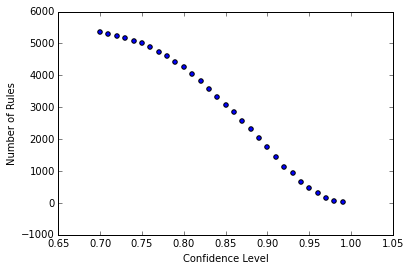

In [13]:
plt.scatter(rules_x, rules_y)
plt.xlabel("Confidence Level")
plt.ylabel("Number of Rules")
# plt.show()
plt.savefig("2c_rules.png")

In [15]:
rules = generateRules(L,suppData, minConf=0.93)


In [45]:
print pol_dict[21]
print pol_dict[29]
print ("__-----")
print pol_dict[1]
print pol_dict[17]

'Prohibiting 2010- 2011 Congressional Cost-of-Living Pay Increase -- Yea'
'Mine Safety Act -- Yea'
__-----
'Democratic'
'Unemployment Benefits Extension -- Yea'
